In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
from pathlib import Path
from dispatches.case_studies.renewables_h2_case.re_h2_parameters import *
plt.style.use('seaborn')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
surrogates_dir = re_h2_dir / "128_results_317_CT_15_500_surrogate"

In [3]:
run = "0000000"
results_df = pd.read_parquet(surrogates_dir / f"results4_{run}.parquet")
df = pd.read_csv(re_h2_dir / "data" / "Wind_Thermal_Gen.csv", index_col="Datetime", parse_dates=True)
results_df.insert(loc=0, column='Wind Load [MW]', value=wind_loads_mw[:len(results_df)])
results_df.insert(loc=0, column='Underpower [MW]', value=results_df['Wind Load [MW]'] - results_df['Total Power Output [MW]'])
results_df['Underpower [MW]'] = results_df['Underpower [MW]'].clip(lower=0)

with open(surrogates_dir / f"results4_{run}.json", 'r') as f:
    results_json = json.load(f)
    results_json.pop("wind_load")
    results_json.pop("batt_hr")
results_json

{'wind_mw': 799.7439220886441,
 'wind_mw_ub': 10000,
 'batt_mw': 0.693817396728787,
 'pem_mw': 0.20764764658810647,
 'pem_bar': 1.01325,
 'pem_temp': 300,
 'tank_size': 1333.3333333333333,
 'turb_mw': 0.07745691201575342,
 'turb_conv': 15.0,
 'tank_holdup_init': 0,
 'h2_price_per_kg': 1.0,
 'build_add_wind': True,
 'design_opt': True,
 'opt_mode': 'surrogate',
 'shortfall_price': 500,
 'wind_cap_cost': 1550,
 'wind_op_cost': 43,
 'batt_cap_cost_kw': 500.0,
 'batt_cap_cost_kwh': 133.33333333333334,
 'batt_rep_cost_kwh': 122.2875,
 'pem_cap_cost': 1466.6666666666667,
 'pem_op_cost': 47.9,
 'pem_var_cost': 0.0013,
 'tank_cap_cost_per_kg': 458.3333333333333,
 'tank_op_cost': 85.0,
 'turbine_cap_cost': 916.6666666666666,
 'turbine_op_cost': 11.65,
 'turbine_var_cost': 0.0042699999999999995,
 'wind_gen': '317_WIND',
 'wind_gen_pmax': 799.1,
 'start_date': '2020-01-01 00:00:00',
 'gas_gen': '317_CT',
 'reserves': 15,
 'shortfall': 500,
 'tempfile': '/lustre/eaglefs/projects/gmihybridsys/dguit

In [4]:
results_df.columns

Index(['Underpower [MW]', 'Wind Load [MW]', 'Total Wind Generation [MW]',
       'Total Power Output [MW]', 'Wind Power Output [MW]',
       'Wind Power to Battery [MW]', 'State of Charge [MWh]',
       'Battery Power Output [MW]', 'Wind Power to PEM [MW]',
       'PEM H2 Output [kg]', 'Tank H2 Input [kg]', 'H2 Sales [kg]',
       'Turbine H2 Input [kg]"', 'Tank Holdup [kg]',
       'Turbine Power Output [MW]', 'Peaker Power Output [MW]',
       'Peaker Sold Power Month [MWh]', 'Peaker Energy Price [$/MWh]',
       'Peaker Revenue [$]', 'Peaker Dispatch CF Month [1]'],
      dtype='object')

In [5]:
results_df.iloc[results_df['Peaker Power Output [MW]'].argmax()]
results_df[results_df['Peaker Power Output [MW]'] > 0]
results_df[results_df['Wind Power to Battery [MW]'] > 10]
results_df.iloc[results_df['H2 Sales [kg]'].argmax()]
results_df.describe()


,Underpower [MW],Wind Load [MW],Total Wind Generation [MW],Total Power Output [MW],Wind Power Output [MW],Wind Power to Battery [MW],State of Charge [MWh],Battery Power Output [MW],Wind Power to PEM [MW],PEM H2 Output [kg],Tank H2 Input [kg],H2 Sales [kg],"Turbine H2 Input [kg]""",Tank Holdup [kg],Turbine Power Output [MW],Peaker Power Output [MW],Peaker Sold Power Month [MWh],Peaker Energy Price [$/MWh],Peaker Revenue [$],Peaker Dispatch CF Month [1]
count,8784.0,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8.784000e+03,8784.000000,8784.000000,8784.000000,8784.000000,8.784000e+03,8784.000000,8.784000e+03,8.784000e+03,8784.000000,8784.000000,8784.000000,8784.000000
mean,0.0,244.150874,249.459096,249.370084,249.343961,0.024013,2.557349,2.167184e-02,0.091122,1.658168,1.658168,1.361437,2.967309e-01,84.350783,4.450964e-03,2.612281e-02,19.114333,39.037917,746.183740,0.023626
std,0.0,276.941794,277.264947,277.169962,277.175230,0.065763,0.680408,2.512165e-02,0.084952,1.545908,1.545908,0.932396,2.288174e-01,22.752644,3.432262e-03,2.766834e-02,17.698158,0.000000,690.899243,0.021876
min,0.0,0.000000,2.101356,1.840483,1.840483,0.000338,0.011772,1.587587e-19,0.000850,0.015462,0.015462,0.122102,1.273424e-19,5.659755,1.910135e-21,1.577278e-16,0.904505,39.037917,35.309993,0.001118
25%,0.0,8.300000,9.806377,9.824903,9.800785,0.001608,2.170252,2.115520e-03,0.004613,0.083937,0.083937,0.674658,1.211819e-01,71.505519,1.817729e-03,4.085693e-03,3.354798,39.037917,130.964326,0.004147
50%,0.0,92.800000,108.073267,108.047376,108.008753,0.003641,2.605703,1.069637e-02,0.056410,1.026503,1.026503,1.152990,2.780201e-01,86.045961,4.170302e-03,1.490790e-02,12.964946,39.037917,506.124471,0.016025
75%,0.0,484.825000,492.969698,492.764507,492.738284,0.011877,3.040932,3.414551e-02,0.189949,3.456570,3.456570,1.947411,4.565065e-01,97.973586,6.847598e-03,4.215418e-02,34.287538,39.037917,1338.514054,0.042381
max,0.0,794.100000,794.516683,794.329220,794.316551,0.532562,4.425734,8.855515e-02,0.204020,3.712616,3.712616,3.408403,1.606239e+00,144.579886,2.409359e-02,9.076228e-02,49.981553,39.037917,1951.175711,0.061780


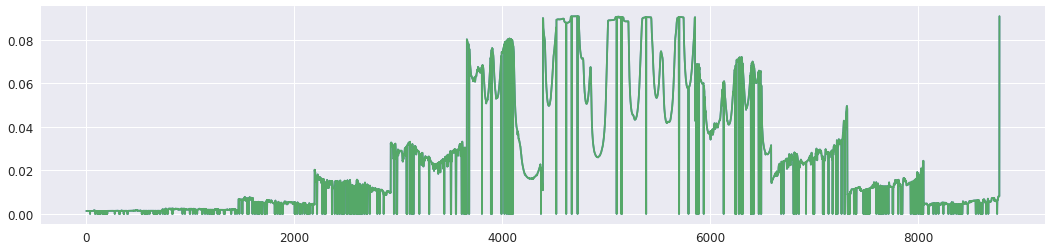

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(18, 4))
ax.plot(results_df['Peaker Power Output [MW]'])
ax.plot(results_df['Peaker Power Output [MW]'])

In [7]:
results_df = results_df.set_index(df.index[:len(results_df)])
resampling_d = {k: np.sum for k in ['Underpower [MW]', 'Wind Load [MW]', 'Total Wind Generation [MW]',
       'Total Power Output [MW]', 'Wind Power Output [MW]',
       'Wind Power to Battery [MW]', 'State of Charge [MWh]',
       'Battery Power Output [MW]', 'Wind Power to PEM [MW]',
       'PEM H2 Output [kg]', 'Tank H2 Input [kg]', 'H2 Sales [kg]',
       'Turbine H2 Input [kg]"', 'Tank Holdup [kg]',
       'Turbine Power Output [MW]', 'Peaker Power Output [MW]']}
resampling_d.update(  
       {k: np.mean for k in ['Peaker Energy Price [$/MWh]',
       'Peaker Revenue [$]',
       'Peaker Sold Power Month [MWh]',
       'Peaker Dispatch CF Month [1]']})
results_df_month = results_df.resample("1M").agg(resampling_d)
display(results_df_month)
results_df_month.sum(axis=0, numeric_only=True)

,Underpower [MW],Wind Load [MW],Total Wind Generation [MW],Total Power Output [MW],Wind Power Output [MW],Wind Power to Battery [MW],State of Charge [MWh],Battery Power Output [MW],Wind Power to PEM [MW],PEM H2 Output [kg],Tank H2 Input [kg],H2 Sales [kg],"Turbine H2 Input [kg]""",Tank Holdup [kg],Turbine Power Output [MW],Peaker Power Output [MW],Peaker Energy Price [$/MWh],Peaker Revenue [$],Peaker Sold Power Month [MWh],Peaker Dispatch CF Month [1]
Datetime,,,,,,,,,,,,,,,,,,,,
2020-01-31,0.0,387765.482755,393667.299854,393544.702503,393543.777879,1.700435,1694.039530,0.429055,121.821540,2216.825943,2216.825943,2155.103466,33.037903,64200.215267,0.495569,0.924624,39.037917,35.596749,0.911851,0.001127
2020-02-29,0.0,166409.097941,170601.342206,170538.279828,170536.980175,1.250720,2064.735262,0.685600,63.111311,1148.456919,1148.456919,1135.537874,40.936831,59223.687601,0.614052,1.299653,39.037917,53.088824,1.359930,0.001681
2020-03-31,0.0,221807.620536,226547.243777,226461.252285,226457.912569,2.532546,2354.245117,2.081977,86.798663,1579.503316,1579.503316,1462.940302,83.849301,64043.732302,1.257740,3.339716,39.037917,128.452213,3.290447,0.004067
2020-04-30,0.0,124516.917683,128543.385034,128478.269940,128470.427559,5.516036,2081.164923,5.276349,67.441439,1227.253665,1227.253665,1057.891018,171.068841,62821.489708,2.566033,7.842381,39.037917,310.403574,7.951335,0.009828
2020-05-31,0.0,122320.295117,127210.895921,127155.634340,127137.569628,14.912561,1974.849966,13.526551,58.413731,1062.973549,1062.973549,754.032982,302.544023,60985.278567,4.538160,18.064712,39.037917,686.373086,17.582216,0.021733
2020-06-30,0.0,128218.000114,129872.037713,129827.384703,129793.407345,30.242133,1922.502972,29.059389,48.388234,880.536339,880.536339,571.843996,327.864553,69478.049069,4.917968,33.977357,39.037917,1327.852220,34.014423,0.042044
2020-07-31,0.0,90445.946486,90824.625009,90801.616102,90752.332854,49.345601,1718.258669,44.577788,22.946554,417.565867,417.565867,145.034077,313.697402,52829.079439,4.705461,49.283249,39.037917,1931.412431,49.475294,0.061154
2020-08-31,0.0,109266.569467,110337.212989,110305.786498,110254.718422,47.851774,1747.710414,44.214573,34.642793,630.406104,630.406104,202.903887,456.900182,59090.582134,6.853503,51.068076,39.037917,1951.175711,49.981553,0.061780
2020-09-30,0.0,136834.959556,139672.984974,139616.993792,139583.070242,34.020363,1870.731454,28.877263,55.894369,1017.127897,1017.127897,625.646032,336.419095,63938.050548,5.046286,33.923550,39.037917,1338.514054,34.287538,0.042381


Underpower [MW]                  0.000000e+00
Wind Load [MW]                   2.144621e+06
Total Wind Generation [MW]       2.191249e+06
Total Power Output [MW]          2.190467e+06
Wind Power Output [MW]           2.190237e+06
Wind Power to Battery [MW]       2.109313e+02
State of Charge [MWh]            2.246376e+04
Battery Power Output [MW]        1.903655e+02
Wind Power to PEM [MW]           8.004117e+02
PEM H2 Output [kg]               1.456535e+04
Tank H2 Input [kg]               1.456535e+04
H2 Sales [kg]                    1.195887e+04
Turbine H2 Input [kg]"           2.606484e+03
Tank Holdup [kg]                 7.409373e+05
Turbine Power Output [MW]        3.909727e+01
Peaker Power Output [MW]         2.294627e+02
Peaker Energy Price [$/MWh]      4.684550e+02
Peaker Revenue [$]               8.919343e+03
Peaker Sold Power Month [MWh]    2.284790e+02
Peaker Dispatch CF Month [1]     2.824118e-01
dtype: float64

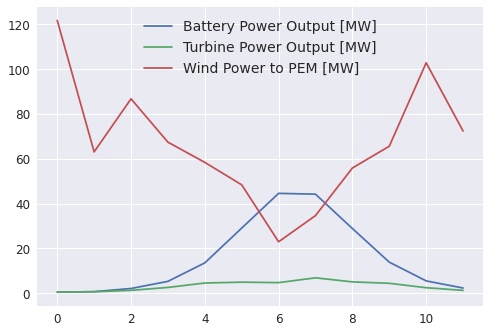

In [38]:
results_df_month.reset_index()[['Battery Power Output [MW]', 'Turbine Power Output [MW]', 'Wind Power to PEM [MW]']].plot()

In [51]:
# results_df_month['Wind Curtailment [MW'] = 
results_df_month['Turbine Power Output [MWh]'] = results_df_month['Turbine Power Output [MW]'] 
results_df_month['Battery Power Output [MWh]'] = results_df_month['Battery Power Output [MW]'] 
results_df_month['Wind Power to PEM [MWh]'] = results_df_month['Wind Power to PEM [MW]'] 


Text(0, 0.5, 'tons H2')

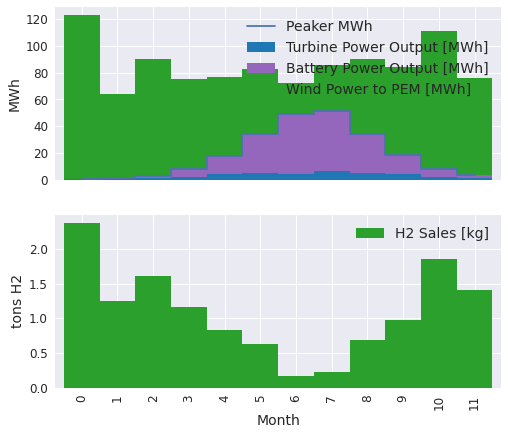

In [52]:
import seaborn as sns
palette = sns.color_palette("tab10")
fig, ax = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
ax[0].plot(range(12), results_df_month['Peaker Power Output [MW]'], label="Peaker MWh", drawstyle="steps-mid")
results_df_month.reset_index()[['Turbine Power Output [MWh]', 'Battery Power Output [MWh]', 
    'Wind Power to PEM [MWh]', 
]].plot(kind='bar', width=1, stacked=True, ax=ax[0],
    color=[list(palette[0]) + [1], list(palette[4]) + [1], list(palette[2]) + [1], list(palette[6]) + [0.5], list(palette[8]) + [0.5]])
# ax[0].bar(range(12), results_df_month['Battery Power Output [MW]'], label="Battery MWh")
# ax[0].bar(range(12), results_df_month['Turbine Power Output [MW]'], bottom = results_df_month['Battery Power Output [MW]'], label="Turbine MWh")
ax[0].legend()
ax[0].set_xlabel("Month")
ax[0].set_ylabel("MWh")
(results_df_month.reset_index()[['H2 Sales [kg]']] * kg_to_tons).plot(kind='bar', width=1, stacked=True, ax=ax[1],
    color=[list(palette[2]) + [1]])
# ax[1].plot(range(12), results_df_month['H2 Sales [kg]'] * kg_to_tons, drawstyle="steps-mid")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("tons H2")

In [8]:
double_loop_name = "double_loop_parametrized_rdc4gen_results_103/"
tracker_df = pd.read_csv(surrogates_dir / double_loop_name / f"tracker_detail.csv")
model_df = pd.read_csv(surrogates_dir / double_loop_name / f"tracking_model_detail.csv")


In [9]:
((results_df_month['Wind Load [MW]'].sum() + results_df_month['Peaker Sold Power Month [MWh]'].sum()) / 
    tracker_df['Power Dispatch [MW]'].sum())

0.36484289753796595

In [10]:
tracker_df

,Date,Hour,Horizon [hr],Power Dispatch [MW],Power Output [MW],Power Underdelivered [MW],Power Overdelivered [MW]
0,2020-01-01,0,0,0.00,0.00,0.0,0.0
1,2020-01-01,0,1,806.12,806.12,0.0,0.0
2,2020-01-01,0,2,381.58,381.58,0.0,0.0
3,2020-01-01,0,3,262.60,262.60,0.0,0.0
4,2020-01-01,1,0,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...
34939,2020-12-29,22,3,460.03,145.85,0.0,0.0
34940,2020-12-29,23,0,0.00,0.00,0.0,0.0
34941,2020-12-29,23,1,460.03,279.85,0.0,0.0
34942,2020-12-29,23,2,460.03,145.85,0.0,0.0


In [11]:
bus_df = pd.read_csv(surrogates_dir / double_loop_name / "bus_detail.csv")
bus_df = bus_df[bus_df['Bus'] == "Chuhsi"]
lmp_rt = bus_df['LMP'].values
lmp_da = bus_df['LMP DA'].values

In [12]:
summary_df = pd.read_csv(surrogates_dir / double_loop_name / "thermal_detail.csv")
summary_df[summary_df["Generator"] == '317_WIND_1']
disp_da = summary_df['Dispatch DA'].values
disp_rt = summary_df['Dispatch'].values

In [13]:
display(tracker_df.describe())
display(tracker_df.sum(axis=0, numeric_only=True))
display(model_df.describe())
display(model_df.sum(axis=0, numeric_only=True))


,Hour,Horizon [hr],Power Dispatch [MW],Power Output [MW],Power Underdelivered [MW],Power Overdelivered [MW]
count,34944.000000,34944.00000,34944.000000,34944.000000,34944.000000,34944.0
mean,11.500000,1.50000,168.235779,133.249048,34.944560,0.0
std,6.922286,1.11805,244.828696,220.125743,98.271935,0.0
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
25%,5.750000,0.75000,0.000000,0.000000,0.000000,0.0
50%,11.500000,1.50000,33.740000,20.230000,0.000000,0.0
75%,17.250000,2.25000,260.765000,148.820000,2.440000,0.0
max,23.000000,3.00000,867.000000,867.000000,750.310000,0.0


Hour                          401856.00
Horizon [hr]                   52416.00
Power Dispatch [MW]          5878831.06
Power Output [MW]            4656254.73
Power Underdelivered [MW]    1221102.72
Power Overdelivered [MW]           0.00
dtype: float64

,Hour,Horizon [hr],Total Wind Generation [MW],Total Power Output [MW],Wind Power Output [MW],Wind Curtailment [MW],Battery Power Output [MW],Wind Power to Battery [MW],State of Charge [MWh],Wind Power to PEM [MW],PEM H2 Output [kg],Tank H2 Input [kg],H2 Sales [kg],Turbine H2 Input [kg],Tank Holdup [kg],Turbine Power Output [MW],Total Cost [$]
count,34944.000000,34944.00000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.0,34944.000000,34944.000000,34944.000000,34944.000000
mean,11.500000,1.50000,133.947814,133.249042,125.763827,284.272988,3.187236,1.779817,100.739019,6.404181,116.538693,116.538693,0.0,214.899338,4968.739529,4.297976,15052.538560
std,6.922286,1.11805,222.473990,220.125801,217.058627,312.518027,2.836753,2.689360,5.948971,11.185254,203.541334,203.541334,0.0,193.883401,341.197148,3.877676,24415.897505
min,0.000000,0.00000,0.000000,0.000000,0.000000,2.278000,0.000000,-0.000000,11.700000,0.000000,0.000000,0.000000,0.0,0.000000,961.158000,0.000000,0.000000
25%,5.750000,0.75000,0.000000,0.000000,0.000000,10.714000,0.000000,0.000000,98.084000,0.000000,0.000000,0.000000,0.0,0.000000,4804.747000,0.000000,34.374000
50%,11.500000,1.50000,11.935000,20.234000,6.944000,118.153000,5.415000,0.000000,104.400000,0.000000,0.000000,0.000000,0.0,346.440000,5207.247000,6.929000,835.427000
75%,17.250000,2.25000,151.245000,148.815000,136.803000,577.638000,6.000000,6.000000,104.400000,5.099000,92.795000,92.795000,0.0,402.500000,5207.247000,8.050000,20362.602000
max,23.000000,3.00000,859.514000,867.000000,858.537000,862.660000,6.000000,6.000000,104.400000,30.700000,558.658000,558.658000,0.0,402.500000,5207.247000,8.050000,86266.012000


Hour                          4.018560e+05
Horizon [hr]                  5.241600e+04
Total Wind Generation [MW]    4.680672e+06
Total Power Output [MW]       4.656255e+06
Wind Power Output [MW]        4.394691e+06
Wind Curtailment [MW]         9.933635e+06
Battery Power Output [MW]     1.113748e+05
Wind Power to Battery [MW]    6.219392e+04
State of Charge [MWh]         3.520224e+06
Wind Power to PEM [MW]        2.237877e+05
PEM H2 Output [kg]            4.072328e+06
Tank H2 Input [kg]            4.072328e+06
H2 Sales [kg]                 0.000000e+00
Turbine H2 Input [kg]         7.509442e+06
Tank Holdup [kg]              1.736276e+08
Turbine Power Output [MW]     1.501885e+05
Total Cost [$]                5.259959e+08
dtype: float64